<a href="https://colab.research.google.com/github/agu06/KaggleX-AI-ML-Skill-Assessment-Challenge/blob/main/KaggleX_Skill_Assessment_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')
submission_data = pd.read_csv('/content/sample_submission.csv')

In [ ]:
print(train_data.head())

   id    brand          model  model_year  milage fuel_type  \
0   0     Ford   F-150 Lariat        2018   74349  Gasoline   
1   1      BMW          335 i        2007   80000  Gasoline   
2   2   Jaguar      XF Luxury        2009   91491  Gasoline   
3   3      BMW   X7 xDrive40i        2022    2437    Hybrid   
4   4  Pontiac  Firebird Base        2001  111000  Gasoline   

                                              engine  \
0      375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
1  300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
2       300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel   
3  335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
4      200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col       accident clean_title  \
0                    10-Speed A/T    Blue    Gray  None reported         Yes   
1                     6-Speed M/T   Black   Black  None reported         Yes   
2                     6-Speed A/T  Purple   

In [ ]:
print(train_data.describe(include='all'))

                  id  brand      model    model_year         milage fuel_type  \
count   54273.000000  54273      54273  54273.000000   54273.000000     54273   
unique           NaN     53       1827           NaN            NaN         7   
top              NaN    BMW  F-150 XLT           NaN            NaN  Gasoline   
freq             NaN   7369        780           NaN            NaN     49439   
mean    27136.000000    NaN        NaN   2015.091979   72746.175667       NaN   
std     15667.409917    NaN        NaN      5.588909   50469.490448       NaN   
min         0.000000    NaN        NaN   1974.000000     100.000000       NaN   
25%     13568.000000    NaN        NaN   2012.000000   32268.000000       NaN   
50%     27136.000000    NaN        NaN   2016.000000   66107.000000       NaN   
75%     40704.000000    NaN        NaN   2019.000000  102000.000000       NaN   
max     54272.000000    NaN        NaN   2024.000000  405000.000000       NaN   

                           

In [ ]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54273 non-null  int64 
 1   brand         54273 non-null  object
 2   model         54273 non-null  object
 3   model_year    54273 non-null  int64 
 4   milage        54273 non-null  int64 
 5   fuel_type     54273 non-null  object
 6   engine        54273 non-null  object
 7   transmission  54273 non-null  object
 8   ext_col       54273 non-null  object
 9   int_col       54273 non-null  object
 10  accident      54273 non-null  object
 11  clean_title   54273 non-null  object
 12  price         54273 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.4+ MB
None


In [ ]:
print(train_data.shape)


(54273, 13)


In [ ]:
print(train_data.value_counts())

id     brand      model                             model_year  milage  fuel_type  engine                                                        transmission                    ext_col  int_col  accident                                clean_title  price
0      Ford       F-150 Lariat                      2018        74349   Gasoline   375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel                 10-Speed A/T                    Blue     Gray     None reported                           Yes          11000    1
36174  Toyota     RAV4 Base                         2008        160000  Gasoline   179.0HP 2.5L 4 Cylinder Engine Gasoline Fuel                  4-Speed A/T                     Black    Red      None reported                           Yes          8000     1
36176  Hummer     H2 Base                           2006        153818  Gasoline   316.0HP 6.0L 8 Cylinder Engine Gasoline Fuel                  A/T                             Black    Black    At least 1 accident or damage rep

In [ ]:
print(test_data.head())

      id          brand                                              model  \
0  54273  Mercedes-Benz                                      E-Class E 350   
1  54274          Lexus                                        RX 350 Base   
2  54275  Mercedes-Benz                                      C-Class C 300   
3  54276           Land  Rover Range Rover 5.0L Supercharged Autobiogra...   
4  54277            BMW                                       X6 xDrive40i   

   model_year  milage fuel_type  \
0        2014   73000  Gasoline   
1        2015  128032  Gasoline   
2        2015   51983  Gasoline   
3        2018   29500  Gasoline   
4        2020   90000  Gasoline   

                                              engine  \
0      302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
1      275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
2       241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   
3       518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
4  335.0HP 3.0L Straight 6 Cylinder Engi

In [ ]:
print(submission_data.head())

      id      price
0  54273  39218.443
1  54274  39218.443
2  54275  39218.443
3  54276  39218.443
4  54277  39218.443


In [ ]:
print(train_data.groupby('brand')['price'].mean().apply(lambda x: format(x, '.2f')))

brand
Acura              27899.55
Alfa               45712.24
Aston             117885.82
Audi               37091.37
BMW                40276.03
Bentley           105211.79
Bugatti          1950995.00
Buick              27693.25
Cadillac           36575.84
Chevrolet          44751.11
Chrysler           19518.67
Dodge              28938.06
FIAT               14183.88
Ferrari           158404.33
Ford               38154.06
GMC                41570.95
Genesis            51462.40
Honda              18568.90
Hummer             30578.99
Hyundai            18931.53
INFINITI           29694.08
Jaguar             34840.40
Jeep               30703.34
Kia                29087.56
Lamborghini       144773.86
Land               47714.27
Lexus              30685.44
Lincoln            27733.62
Lotus              38456.58
Lucid              84185.00
MINI               16055.87
Maserati           56872.70
Maybach            60333.33
Mazda              24223.28
McLaren           109174.77
Mercedes-Benz 

In [ ]:
print(train_data['brand'].unique())

['Ford' 'BMW' 'Jaguar' 'Pontiac' 'Acura' 'Audi' 'GMC' 'Maserati'
 'Chevrolet' 'Porsche' 'Mercedes-Benz' 'Tesla' 'Lexus' 'Kia' 'Lincoln'
 'Dodge' 'Volkswagen' 'Land' 'Cadillac' 'Mazda' 'RAM' 'Subaru' 'Hyundai'
 'MINI' 'Jeep' 'Honda' 'Hummer' 'Nissan' 'Toyota' 'Volvo' 'Genesis'
 'Mitsubishi' 'Buick' 'INFINITI' 'McLaren' 'Scion' 'Lamborghini' 'Bentley'
 'Suzuki' 'Ferrari' 'Alfa' 'Rolls-Royce' 'Chrysler' 'Aston' 'Rivian'
 'Lotus' 'Saturn' 'Lucid' 'Mercury' 'Maybach' 'FIAT' 'Plymouth' 'Bugatti']


In [ ]:
print(train_data['brand'].value_counts())

brand
BMW              7369
Ford             6706
Mercedes-Benz    5087
Chevrolet        4424
Audi             2922
Porsche          2627
Toyota           2315
Lexus            2257
Jeep             2247
Land             1995
Cadillac         1565
Nissan           1252
GMC              1076
Dodge            1011
RAM               966
INFINITI          957
Lincoln           767
Mazda             748
Subaru            739
Hyundai           694
Jaguar            661
Volkswagen        628
Honda             624
Acura             580
Kia               526
Volvo             452
MINI              364
Maserati          293
Bentley           284
Chrysler          258
Genesis           249
Buick             228
Mitsubishi        182
Hummer            176
Pontiac           149
Alfa              144
Rolls-Royce       142
Lamborghini       122
Tesla             110
Ferrari            87
Saturn             58
Scion              53
Aston              50
McLaren            43
Rivian             27
Merc

In [ ]:
print(train_data[train_data['brand'] == 'Bugatti'][['brand', 'model', 'price']])

         brand                    model    price
48311  Bugatti  Veyron 16.4 Grand Sport  1950995


In [ ]:
print(train_data.sort_values('price', ascending=False)[['brand', 'model', 'model_year', 'price']].head(100))

               brand                    model  model_year    price
39761      Chevrolet        Suburban 1500 LTZ        2010  2954083
37341        Porsche           911 Carrera 4S        2005  2954083
41065      Chevrolet                 Tahoe LT        2017  2954083
19661           Audi     A7 3.0T Premium Plus        2017  2954083
5584   Mercedes-Benz  SL-Class SL500 Roadster        2004  2954083
...              ...                      ...         ...      ...
4999   Mercedes-Benz            AMG G 63 Base        2020   491836
47910    Lamborghini         Aventador S Base        2018   491836
12452           Ford                F-150 XLT        2020   491836
49143       INFINITI                QX80 Base        2018   491836
41102    Rolls-Royce                  Phantom        2022   489995

[100 rows x 4 columns]


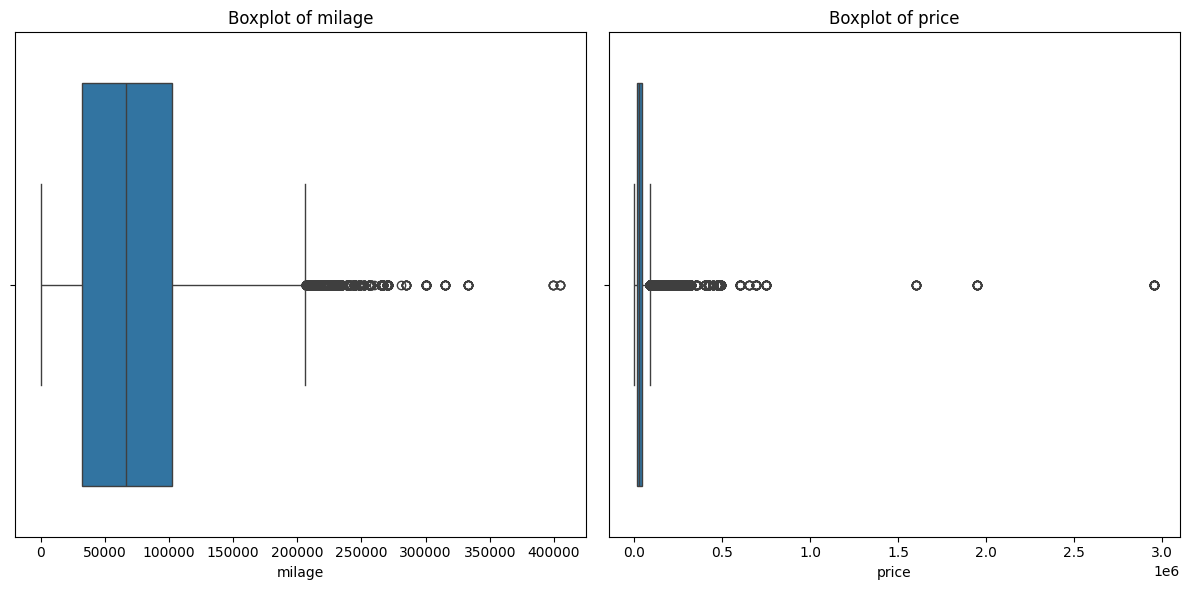

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(x=train_data['milage'], ax=axes[0])
axes[0].set_title('Boxplot of milage')

sns.boxplot(x=train_data['price'], ax=axes[1])
axes[1].set_title('Boxplot of price')

plt.tight_layout()
plt.show()

In [ ]:
print(f"{train_data['milage'].min()}, {train_data['milage'].max()}")

100, 405000


In [ ]:
print(f"Lowest milage: ID={train_data.loc[train_data['milage'].idxmin()]['id']}, Brand={train_data.loc[train_data['milage'].idxmin()]['brand']}, Model={train_data.loc[train_data['milage'].idxmin()]['model']}, Milage={train_data.loc[train_data['milage'].idxmin()]['milage']}")
print(f"Highest milage: ID={train_data.loc[train_data['milage'].idxmax()]['id']}, Brand={train_data.loc[train_data['milage'].idxmax()]['brand']}, Model={train_data.loc[train_data['milage'].idxmax()]['model']}, Milage={train_data.loc[train_data['milage'].idxmax()]['milage']}")

Lowest milage: ID=4285, Brand=Lexus, Model=LS 460 Base, Milage=100
Highest milage: ID=8674, Brand=Mazda, Model=MX-5 Miata RF Grand Touring, Milage=405000
